In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from gzreduction.vote_sources.panoptes_exports import export_to_responses
from gzreduction.vote_sources.panoptes_exports import aggregate
from gzreduction.schemas.judges_schema import judges_schema, judges_v2_schema

In [3]:
date_str = '2024_11_18'

In [4]:
# classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/judges/lenses-classifications_' + date_str + '.csv'
# aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/judges/lenses_reduced_votes_' + date_str + '.csv'
# schema = judges_schema

classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/judges/lenses-v2-classifications_' + date_str + '.csv'
aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/judges/lenses-v2-reduced_votes_' + date_str + '.csv'
schema = judges_v2_schema

In [5]:
# nrows = 10000
nrows = None
clf = pd.read_csv(classification_export_loc, nrows=nrows)
clf

classification_id     user_name  user_id               user_ip  \
0              598402426  MikeWalmsley   290475  43aec06822d55af47fae   
1              598402436  MikeWalmsley   290475  43aec06822d55af47fae   
2              598402441  MikeWalmsley   290475  43aec06822d55af47fae   
3              598402447  MikeWalmsley   290475  43aec06822d55af47fae   
4              598402457  MikeWalmsley   290475  43aec06822d55af47fae   
...                  ...           ...      ...                   ...   
15975          599120457        eckerl  2801907  6c8423bde236c4228e54   
15976          599120492        eckerl  2801907  6c8423bde236c4228e54   
15977          599120512        eckerl  2801907  6c8423bde236c4228e54   
15978          599120564        eckerl  2801907  6c8423bde236c4228e54   
15979          599171725        eckerl  2801907  1b8332cf81fe6f85052a   

       workflow_id workflow_name  workflow_version               created_at  \
0            27751     Lenses v2              2.12  2024-11-15 03:04:35 UTC   
1            27751     Lenses v2              2.12  2024-11-15 03:04:41 UTC   
2            27751     Lenses v2              2.12  2024-11-15 03:04:44 UTC   
3            27751     Lenses v2              2.12  2024-11-15 03:04:47 UTC   
4            27751     Lenses v2              2.12  2024-11-15 03:04:53 UTC   
...            ...           ...               ...                      ...   
15975        27751     Lenses v2              2.12  2024-11-18 17:50:54 UTC   
15976        27751     Lenses v2              2.12  2024-11-18 17:51:01 UTC   
15977        27751     Lenses v2              2.12  2024-11-18 17:51:04 UTC   
15978        27751     Lenses v2              2.12  2024-11-18 17:51:16 UTC   
15979        27751     Lenses v2              2.12  2024-11-18 21:06:26 UTC   

       gold_standard  expert  \
0                NaN     NaN   
1                NaN     NaN   
2                NaN     NaN   
3                NaN     NaN   
4                NaN     NaN   
...              ...     ...   
15975            NaN     NaN   
15976            NaN     NaN   
15977            NaN     NaN   
15978            NaN     NaN   
15979            NaN     NaN   

                                                metadata  \
0      {"source":"api","session":"5a67efe05e2bba7d55a...   
1      {"source":"api","session":"5a67efe05e2bba7d55a...   
2      {"source":"api","session":"5a67efe05e2bba7d55a...   
3      {"source":"api","session":"5a67efe05e2bba7d55a...   
4      {"source":"api","session":"5a67efe05e2bba7d55a...   
...                                                  ...   
15975  {"source":"api","session":"5e11baeab8af6439d6d...   
15976  {"source":"api","session":"5e11baeab8af6439d6d...   
15977  {"source":"api","session":"5e11baeab8af6439d6d...   
15978  {"source":"api","session":"5e11baeab8af6439d6d...   
15979  {"source":"api","session":"fee1ae99da1921bcbf2...   

                                             annotations  \
0      [{"task":"T0","task_label":"Is this a strong l...   
1      [{"task":"T0","task_label":"Is this a strong l...   
2      [{"task":"T0","task_label":"Is this a strong l...   
3      [{"task":"T0","task_label":"Is this a strong l...   
4      [{"task":"T0","task_label":"Is this a strong l...   
...                                                  ...   
15975  [{"task":"T0","task_label":"Is this a strong l...   
15976  [{"task":"T0","task_label":"Is this a strong l...   
15977  [{"task":"T0","task_label":"Is this a strong l...   
15978  [{"task":"T0","task_label":"Is this a strong l...   
15979  [{"task":"T0","task_label":"Is this a strong l...   

                                            subject_data  subject_ids  
0      {"104580456":{"retired":{"id":135401516,"workf...    104580456  
1      {"104581110":{"retired":{"id":135402394,"workf...    104581110  
2      {"104580261":{"retired":{"id":135401479,"workf...    104580261  
3      {"104580481":{"retired":{"id":135401958,"workf...    104580

In [6]:
clf['annotations'].iloc[0]

'[{"task":"T0","task_label":"Is this a strong lens?","value":"Not a lens, but otherwise interesting"}]'

In [7]:
clf['user_name'].value_counts()

user_name
natalielines     2106
saiph87          1908
lauraleuzzi      1196
knud             1130
curiosorus        957
joshwilde         845
byc               824
rgavazzi          795
ThaiTran          752
ctortora          750
Tom_Collett       735
aymgal            610
Krojas26          594
kiaraspin         424
astrosonnen       327
anasainzdm        313
LoreUlo           312
rbmetcalf         274
schuldt           246
SkyLi             245
weisluke          200
philholloway      126
kfinner            77
alejandramelo      44
MikeWalmsley       39
cgiocoli           34
courbin            32
martin_M           29
eckerl             24
nhogg              19
rpcopen            10
Aprajita            3
Name: count, dtype: int64

In [8]:
len(clf['user_ip'].unique())

264

In [9]:
len(clf['user_name'].unique())

32

In [10]:
counts_per = clf['user_name'].value_counts()[:40]

(1, 2922.6393175774933)

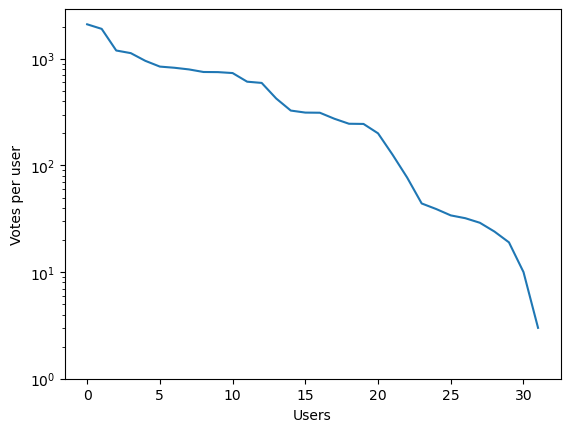

In [11]:

plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).values)
plt.yscale('log')
plt.xlabel('Users')
plt.ylabel('Votes per user')
plt.ylim(1, None)

Text(0, 0.5, 'Cum. votes by those volunteers')

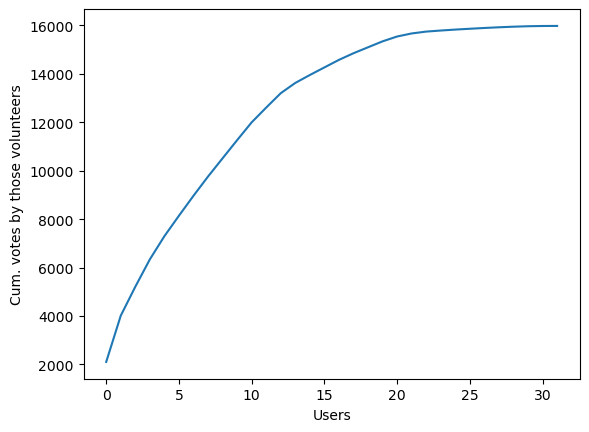

In [12]:

plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).cumsum().values)
# plt.yscale('log')
plt.xlabel('Users')
plt.ylabel('Cum. votes by those volunteers')

In [13]:
def get_euclid_subject_id(subject_data):
    loaded = json.loads(subject_data)
    print(loaded)
    inner_dict = loaded[list(loaded.keys())[0]]
    if '!filename' in inner_dict:
        return inner_dict['!filename']
    if 'Filename' in inner_dict:
        return inner_dict['Filename'] 
    raise ValueError(inner_dict)

In [14]:
clf['id_str'] = clf['subject_data'].apply(get_euclid_subject_id)
clf['id_str'] 

{'104580456': {'retired': {'id': 135401516, 'workflow_id': 27751, 'classifications_count': 13, 'created_at': '2024-11-15T02:52:57.524Z', 'updated_at': '2024-11-15T22:26:13.170Z', 'retired_at': '2024-11-15T22:26:13.161Z', 'subject_id': 104580456, 'retirement_reason': 'classification_count'}, '!filename': '6f216b56f0f7331b4b8a7b73a79bb25916e958b10832ec00b3288f0a4d423f7d', '#campaign': 'galaxy_judges_round_1_ml_scores', '#upload_date': '2024-11-15'}}
{'104581110': {'retired': {'id': 135402394, 'workflow_id': 27751, 'classifications_count': 5, 'created_at': '2024-11-15T03:04:41.398Z', 'updated_at': '2024-11-15T10:51:39.862Z', 'retired_at': '2024-11-15T10:51:39.852Z', 'subject_id': 104581110, 'retirement_reason': 'classification_count'}, '!filename': '9fae8579ca6e07ea544a7e5c154778ce9aee55c91ab380418b9c57d3030b9b34', '#campaign': 'galaxy_judges_round_1_ml_scores', '#upload_date': '2024-11-15'}}
{'104580261': {'retired': {'id': 135401479, 'workflow_id': 27751, 'classifications_count': 10, 'c

0        6f216b56f0f7331b4b8a7b73a79bb25916e958b10832ec...
1        9fae8579ca6e07ea544a7e5c154778ce9aee55c91ab380...
2        4e7ff0fa6311511faee5611b49f21c6db9ce0db303da08...
3        17998c9b935ec5cb1637b491f4dba6389374b92310a129...
4        85d5171c406df76477ffbd11dd6b3a6d7ffd605ad02529...
                               ...                        
15975    13701fb4e34d39be671e435f64af5c528d3e49ca33fbc4...
15976    ce2a46f899ac7b34f0f50be0cf5144399170d0d07550f0...
15977    fd34d830521de6664be21f3434ba3670608219405f3649...
15978    9e00db44d2a167e24b4b60ed47fe5b6f799599eace3f2f...
15979    e85bb6255be314d5e97d3e1ba53df0f250b1e596659cf1...
Name: id_str, Length: 15980, dtype: object

In [15]:
clf.columns.values

array(['classification_id', 'user_name', 'user_id', 'user_ip',
       'workflow_id', 'workflow_name', 'workflow_version', 'created_at',
       'gold_standard', 'expert', 'metadata', 'annotations',
       'subject_data', 'subject_ids', 'id_str'], dtype=object)

In [16]:
len(clf)

15980

In [17]:

# workflows = [22130]
# clf = clf[clf['workflow_id'].isin(workflows)]
# assert len(clf) > 0

In [18]:
clf['created_at'] = pd.to_datetime(clf['created_at'])

In [19]:
clf['annotations'] = clf['annotations'].apply(json.loads)

In [20]:
clf['annotations'].iloc[0]

[{'task': 'T0',
  'task_label': 'Is this a strong lens?',
  'value': 'Not a lens, but otherwise interesting'}]

In [21]:
df = export_to_responses.explode_annotations(clf, exclude_tasks=None)  # now includes T10, rare features, as well
df

task              task_label  \
0       T0  Is this a strong lens?   
1       T0  Is this a strong lens?   
2       T0  Is this a strong lens?   
3       T0  Is this a strong lens?   
4       T0  Is this a strong lens?   
...    ...                     ...   
15975   T0  Is this a strong lens?   
15976   T0  Is this a strong lens?   
15977   T0  Is this a strong lens?   
15978   T0  Is this a strong lens?   
15979   T0  Is this a strong lens?   

                                                   value  \
0                  Not a lens, but otherwise interesting   
1      Grade C (lens-like features could have other e...   
2                            Not a lens, not interesting   
3                            Not a lens, not interesting   
4                  Not a lens, but otherwise interesting   
...                                                  ...   
15975  Grade C (lens-like features could have other e...   
15976  Grade C (lens-like features could have other e...   
15977  Grade C (lens-like features could have other e...   
15978  Grade C (lens-like features could have other e...   
15979                        Not a lens, not interesting   

                                                  id_str  user_id  \
0      6f216b56f0f7331b4b8a7b73a79bb25916e958b10832ec...   290475   
1      9fae8579ca6e07ea544a7e5c154778ce9aee55c91ab380...   290475   
2      4e7ff0fa6311511faee5611b49f21c6db9ce0db303da08...   290475   
3      17998c9b935ec5cb1637b491f4dba6389374b92310a129...   290475   
4      85d5171c406df76477ffbd11dd6b3a6d7ffd605ad02529...   290475   
...                                                  ...      ...   
15975  13701fb4e34d39be671e435f64af5c528d3e49ca33fbc4...  2801907   
15976  ce2a46f899ac7b34f0f50be0cf5144399170d0d07550f0...  2801907   
15977  fd34d830521de6664be21f3434ba3670608219405f3649...  2801907   
15978  9e00db44d2a167e24b4b60ed47fe5b6f799599eace3f2f...  2801907   
15979  e85bb6255be314d5e97d3e1ba53df0f250b1e596659cf1...  2801907   

       classification_id                created_at  subject_ids  \
0              598402426 2024-11-15 03:04:35+00:00    104580456   
1              598402436 2024-11-15 03:04:41+00:00    104581110   
2              598402441 2024-11-15 03:04:44+00:00    104580261   
3              598402447 2024-11-15 03:04:47+00:00    104580481   
4              598402457 2024-11-15 03:04:53+00:00    104580801   
...                  ...                       ...          ...   
15975          599120457 2024-11-18 17:50:54+00:00    104580439   
15976          599120492 2024-11-18 17:51:01+00:00    104580410   
15977          599120512 2024-11-18 17:51:04+00:00    104580463   
15978          599120564 2024-11-18 17:51:16+00:00    104580471   
15979          599171725 2024-11-18 21:06:26+00:00    104580482   

       workflow_version  
0                  2.12  
1                  2.12  
2                  2.12  
3                  2.12  
4                  2.12  
...                 ...  
15975              2.12  
15976              2.12  
15977              2.12  
15978              2.12  
15979              2.12  

[15980 rows x 9 columns]

In [22]:
# duplicates in lenses from Talk
# thanks to Benjamin Clement

# 1. arc vs deflector
to_merge = [
    ('f691c0fc2db0ee7c3a1313dc175b7e75a68526108b05996e9aca7850dc46e778','72f399ba2510d8a69c14752107398aa8f867d6dbb2d91144d0429026175f37ac')
]


# duplicates from votes

to_remove = [
    # carousel cluster
    '22e8b9ac951da8790f47fb388a3224e0a35deacd7e78605a6e3f7ee3c7a6a0a8',
    '65f5e25223587706ec99422ccb01ad902eddb8f30819ce481deff819338dec2f',
    '233462685303aaa8fc66f4c3812395d98112d720f0de1d8965a8d3afc3d690c5',
    '04a73d368c177a33684c90e2f4844ca03ab368c317912778d5e4e1be0e2ee172',
    '6b638bca8aa34b2a50623f1a9dc576faf406eee70236db15d79d0736bc33155a'
]



In [23]:
# merge duplicates
for old_id, new_id in to_merge:
    df['id_str'] = df['id_str'].replace(old_id, new_id)

In [24]:
# remove all carousel cluster votes
df = df[~df['id_str'].isin(to_remove)]
print(len(df))

15980


In [25]:
cleaned = export_to_responses.clean_exploded_annotations(df, schema)

In [26]:
len(cleaned)  # 551945 on 8th Aug, 1278819 on Aug 20th, 1564846 at end-of-August, 1996732 23rd Sept

15980

In [27]:
aggregated = aggregate.responses_to_reduced_votes(cleaned.reset_index(drop=True), schema)

In [28]:
aggregated

question_response                                             id_str  \
0                  000d8c9dbed5967fee4f7bbe3cf71aa7c5fa04c94535c1...   
1                  0019532553f69f3ee258fd8cc13cf0cda42657389948db...   
2                  003168b8c4c1145754837233dfd6411f60d259889577b0...   
3                  0046e11e0f8eee39761434e540bfd05e62d9a1af8a3b69...   
4                  00d18ca451cd111fd3ec95ad5365bb04c954dfe03092f0...   
...                                                              ...   
1952               feebba6c5dcf0244ef406dc1f3d98b8a0a652ba83f2c9d...   
1953               ff0a18c3bfb231a180b31dfc6f8474d0b774b062f50eb8...   
1954               ffdd22a04254a5632f9288b7850f187c725d7bbde6609d...   
1955               ffedfa3e352fb6d3d607f65587272eb38adac9819e1317...   
1956               fff8b4e0597e0a1d0f70b4ad87c0af0a3e974bc53c5067...   

question_response  expert_grade_a_plus  expert_grade_a  expert_grade_b  \
0                                    0               0               0   
1                                    0               0               0   
2                                    0               0               0   
3                                    0               0               1   
4                                    0               0               0   
...                                ...             ...             ...   
1952                                 0               0               1   
1953                                 0               0               0   
1954                                 0               0               0   
1955                                 0               0               0   
1956                                 0               0               0   

question_response  expert_grade_c  expert_not_lens_but_interesting  \
0                               0                                0   
1                               1                                0   
2                               2                                0   
3                               3                                3   
4                               0                                0   
...                           ...                              ...   
1952                            2                                1   
1953                            0                                0   
1954                            0                                0   
1955                            3                                1   
1956                            0                                0   

question_response  expert_not_lens_not_interesting  expert_total-votes  \
0                                               10                  10   
1                                                4                   5   
2                                                3                   5   
3                                                6                  13   
4                                                5                   5   
...                                            ...                 ...   
1952                                             7                  11   
1953                                             5                   5   
1954                                            10                  10   
1955                                             2                   6   
1956                                             5                   5   

question_response  expert_grade_a_plus_fraction  expert_grade_a_fraction  \
0                                           0.0                      0.0   
1                                           0.0                      0.0   
2                                           0.0                      0.0   
3                                           0.0                      0.0   
4                                           0.0                      0.0   
...                                         ...             

In [29]:
aggregated['id_str'].value_counts()

id_str
000d8c9dbed5967fee4f7bbe3cf71aa7c5fa04c94535c149c0c9b95635e80aaf    1
b308a8720b661868a02b57f59d9b4cf0205d39edd9c9324f565cc4ca6cdf35e6    1
b2faea4863a2b838e81a638d17b2d86b0b72df736f0486ed292b3b17ed2e6d5e    1
b2d0b3d1d1ab88bbb098da0560f97d4c5daa6f5af639bea2b9e0f72d66a27ece    1
b2af22c7dfe53b19e3e3abb48c48179d543e864f4ad0a47982244f6ab0d5c674    1
                                                                   ..
55351408bfed7294febd4b37f488fd4518faf5fb217a8a14e0973352613f17a6    1
550e9e185a7bf5169b7e0b4152e1a021b8f16da06c6ad93172b535d05b009d3a    1
54ef60e1596453e25fc79545a637499ac20dfb70d8cfe5cb0ebbd118ab755b87    1
54d709eedcccbc9180b7d1bd1da9105b8328255abacd887445c3446ee3ef47c7    1
fff8b4e0597e0a1d0f70b4ad87c0af0a3e974bc53c5067cf4eda221c48a0820a    1
Name: count, Length: 1957, dtype: int64

In [30]:
# # merge in subject id

# aggregated = aggregated.merge(clf[['id_str', 'subject_ids']].drop_duplicates(), on='id_str', how='left')
# aggregated = aggregated.rename(columns={'subject_ids': 'subject_id'})

In [31]:
aggregated['id_str'].value_counts()

id_str
000d8c9dbed5967fee4f7bbe3cf71aa7c5fa04c94535c149c0c9b95635e80aaf    1
b308a8720b661868a02b57f59d9b4cf0205d39edd9c9324f565cc4ca6cdf35e6    1
b2faea4863a2b838e81a638d17b2d86b0b72df736f0486ed292b3b17ed2e6d5e    1
b2d0b3d1d1ab88bbb098da0560f97d4c5daa6f5af639bea2b9e0f72d66a27ece    1
b2af22c7dfe53b19e3e3abb48c48179d543e864f4ad0a47982244f6ab0d5c674    1
                                                                   ..
55351408bfed7294febd4b37f488fd4518faf5fb217a8a14e0973352613f17a6    1
550e9e185a7bf5169b7e0b4152e1a021b8f16da06c6ad93172b535d05b009d3a    1
54ef60e1596453e25fc79545a637499ac20dfb70d8cfe5cb0ebbd118ab755b87    1
54d709eedcccbc9180b7d1bd1da9105b8328255abacd887445c3446ee3ef47c7    1
fff8b4e0597e0a1d0f70b4ad87c0af0a3e974bc53c5067cf4eda221c48a0820a    1
Name: count, Length: 1957, dtype: int64

In [32]:
aggregated.to_csv(aggregated_loc, index=False)

In [33]:
aggregated_loc

'/home/walml/repos/gz-panoptes-reduction/data/judges/lenses-v2-reduced_votes_2024_11_18.csv'